<a href="https://colab.research.google.com/github/ahamedtm/SLTC_Final_year_project_AutomaticModulationClassification/blob/main/CNN_AMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulation Classification using Deep Learning(CNN)

* Convolutional neural networks (CNN) is used to convert digital image content into a single vector of numbers(numeric vector) representing the unique characteristics of the image.
* The column of numbers is inputted to a Dense fully connected Neural network layer against the labels, which image is BASK, which image is BPSK , BFSK etc.
* The classification model learns these numeric vector inputs against the labels

In [ ]:
# !pip install keras
# !pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random

# Importing Library for Data Visualization | image to number format
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow

# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting
%matplotlib inline

In [ ]:
# Deep Learning CNN model to recognize scatter plot
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''########################## IMAGE PRE-PROCESSING for TRAINING and TESTING data ##############################'''

TrainingImagePath='/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/train'
TestingImagePath='/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/test'
ValidationImagePath='/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid'

# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 6019 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


### Reading the Images data

In [ ]:
# Function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".png")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".png")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

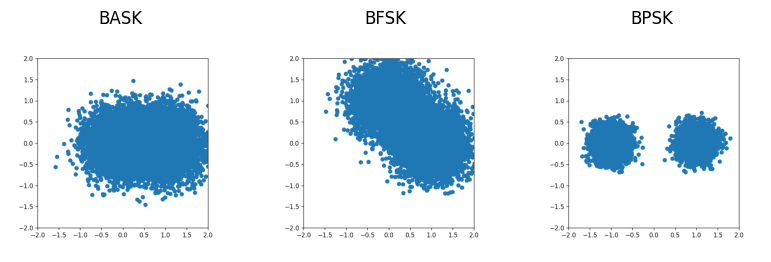

In [ ]:
plt.figure(figsize = (20,20))
for labels,number in training_set.class_indices.items():
    plt.subplot(6,6,number+1)
    showImages(labels)

In [ ]:
# Printing class labels for each face
test_set.class_indices

{'BASK': 0, 'BFSK': 1, 'BPSK': 2}

### Creating a list of faces and classes

In [ ]:
'''#################### Creating lookup table for all Scatter plot ##############################'''
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for Value,Name in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[Value]=Name

# Saving the face map for future reference
import pickle
with open("/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}

 The Number of output neurons:  3


### Creating the CNN model

In [ ]:
'''######################## Create CNN deep learning model ####################################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

### Fitting the model

In [ ]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

<ipython-input-11-18b6e7723b8a>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
189/189 [==============================] - 1943s 10s/step - loss: 0.4553 - accuracy: 0.9510 - val_loss: 2.4521e-06 - val_accuracy: 1.0000
Epoch 2/20
189/189 [==============================] - 282s 1s/step - loss: 3.2757e-06 - accuracy: 1.0000 - val_loss: 2.9365e-07 - val_accuracy: 1.0000
Epoch 3/20
189/189 [==============================] - 280s 1s/step - loss: 1.0633e-06 - accuracy: 1.0000 - val_loss: 1.3212e-07 - val_accuracy: 1.0000
Epoch 4/20
189/189 [==============================] - 284s 1s/step - loss: 6.4057e-07 - accuracy: 1.0000 - val_loss: 8.2453e-08 - val_accuracy: 1.0000
Epoch 5/20
189/189 [==============================] - 277s 1s/step - loss: 4.5309e-07 - accuracy: 1.0000 - val_loss: 5.3644e-08 - val_accuracy: 1.0000
Epoch 6/20
189/189 [==============================] - 279s 1s/step - loss: 3.6301e-07 - accuracy: 1.0000 - val_loss: 4.0531e-08 - val_accuracy: 1.0000
Epoch 7/20
189/189 [==============================] - 281s 1s/step - loss: 2.8552e-07 - accuracy

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

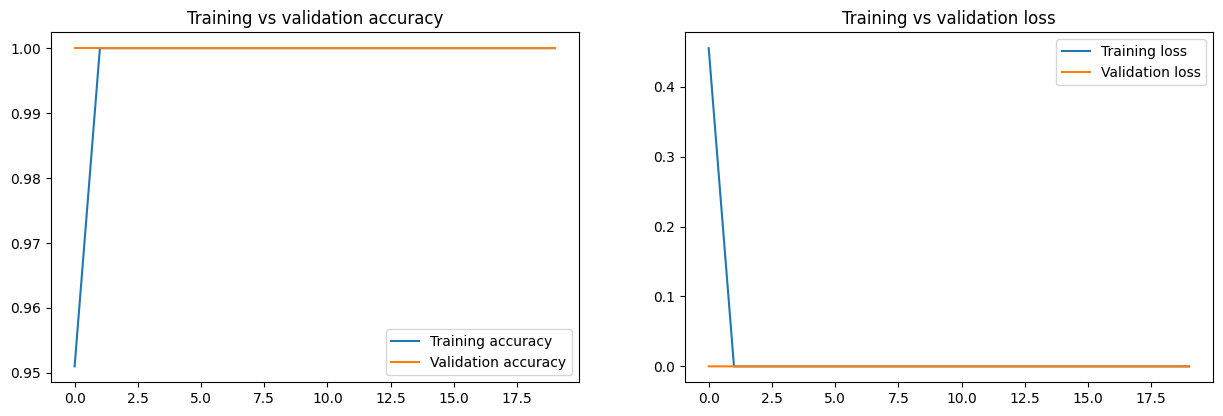

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

### Saving the model

In [ ]:
## Saving the model
classifier.save("/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Model")

### Testing the model on a different face

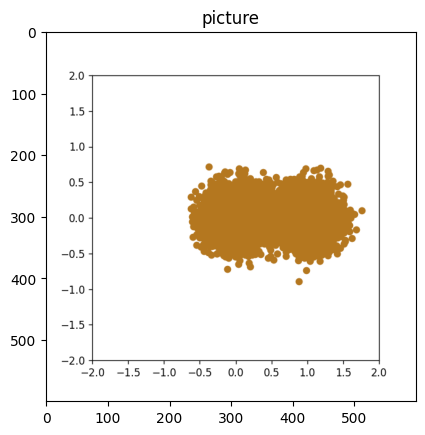

########################################
Prediction is:  BASK


In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/test/BASK/1.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

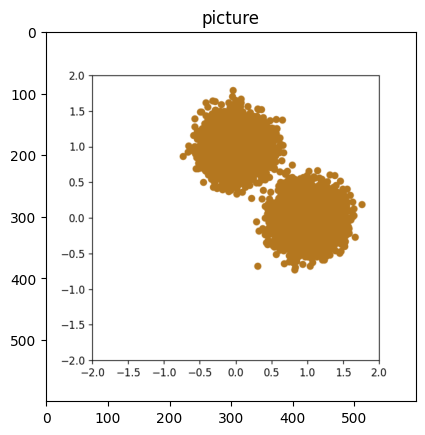

########################################
Prediction is:  BFSK


In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid/BFSK/102.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

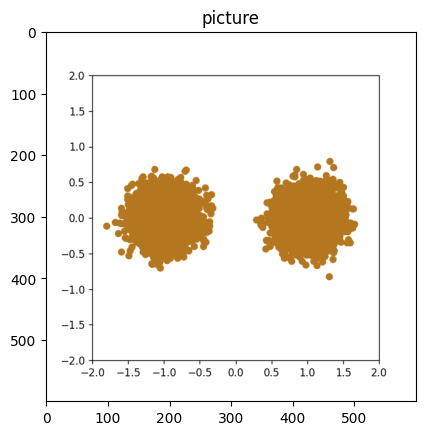

########################################
Prediction is:  BPSK


In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid/BPSK/100.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/Different Data/BPSK.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/Different Data/BPSK_1.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/Different Data/BPSK_2.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

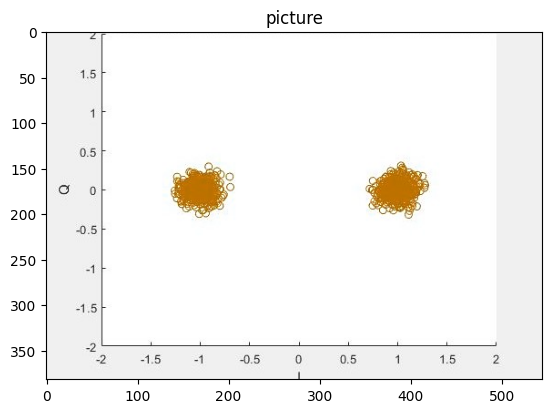

########################################
Prediction is:  BFSK


In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/12.JPG"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

#Making Multiple Predictions

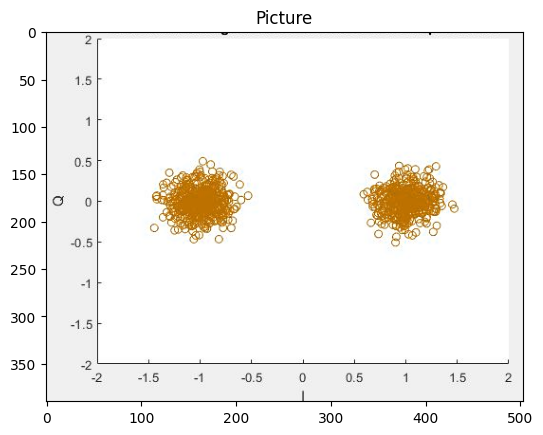

########################################
Prediction for 11.JPG is: BPSK


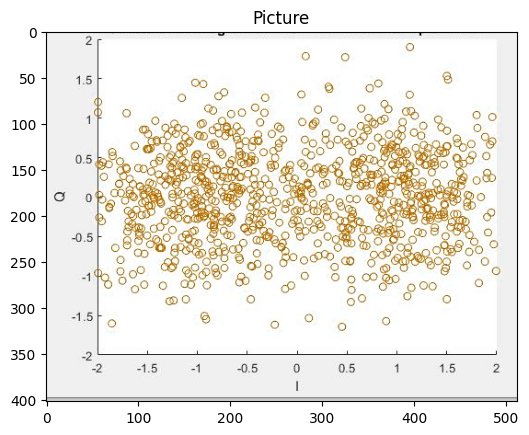

########################################
Prediction for 14.JPG is: BPSK


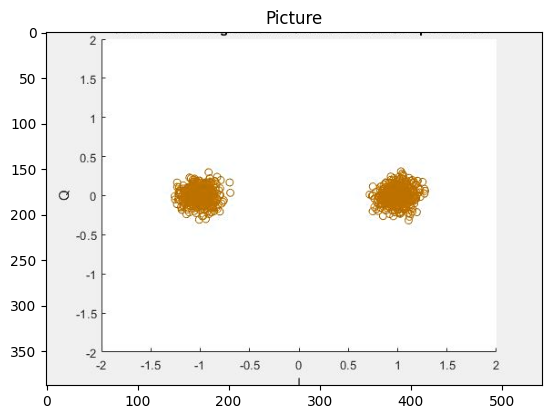

########################################
Prediction for 12.JPG is: BFSK


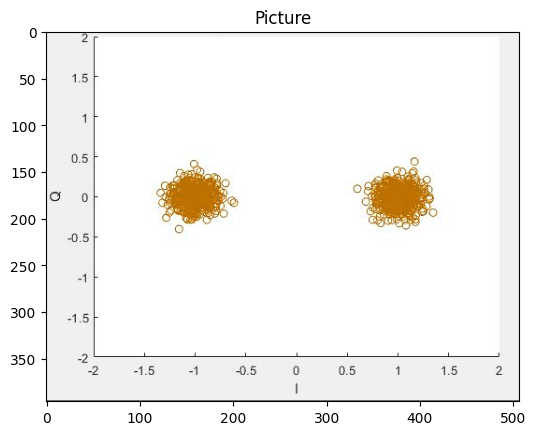

########################################
Prediction for 19.JPG is: BPSK


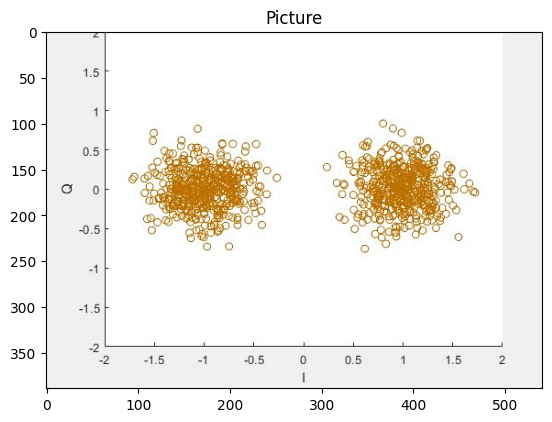

########################################
Prediction for 24.JPG is: BPSK


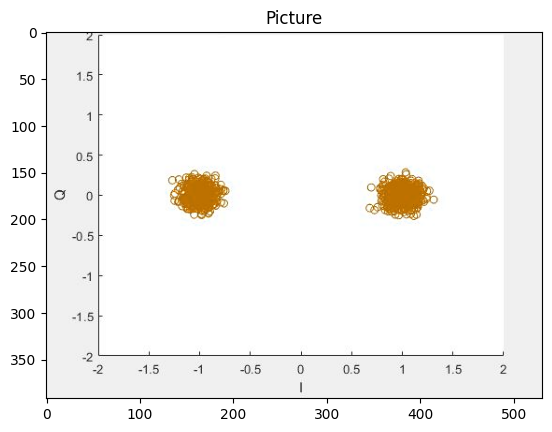

########################################
Prediction for 1.JPG is: BFSK


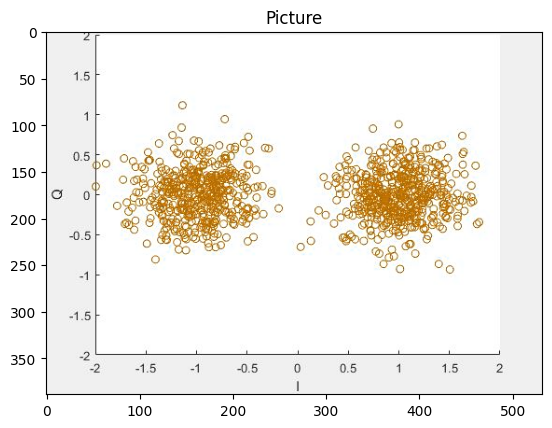

########################################
Prediction for 21.JPG is: BPSK


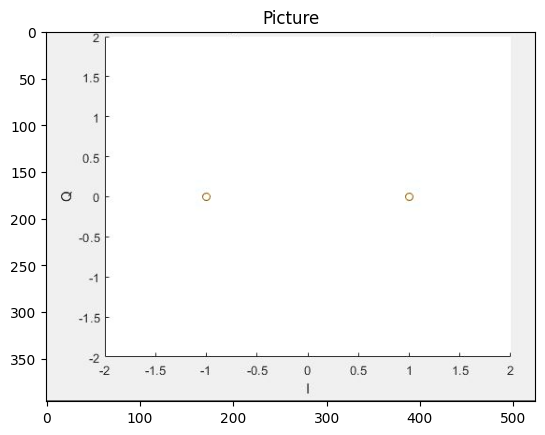

########################################
Prediction for 18.JPG is: BFSK


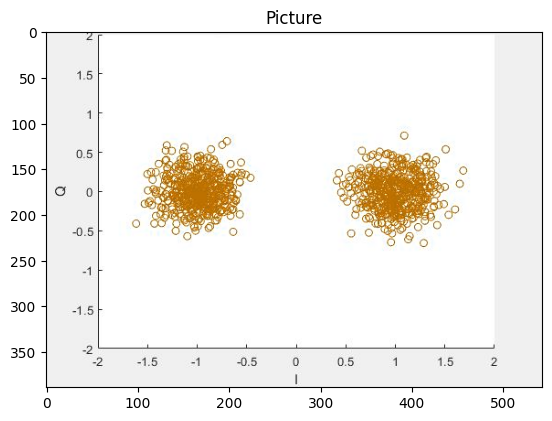

########################################
Prediction for 22.JPG is: BPSK


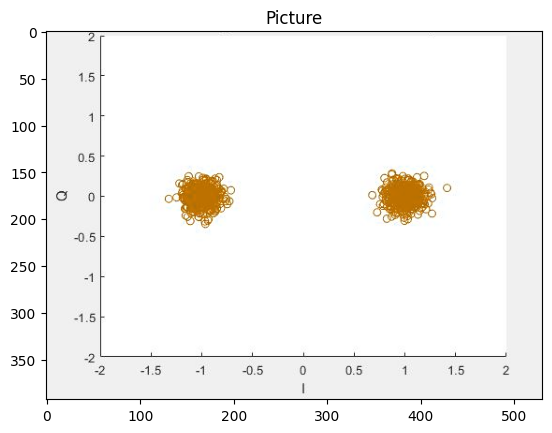

########################################
Prediction for 15.JPG is: BFSK


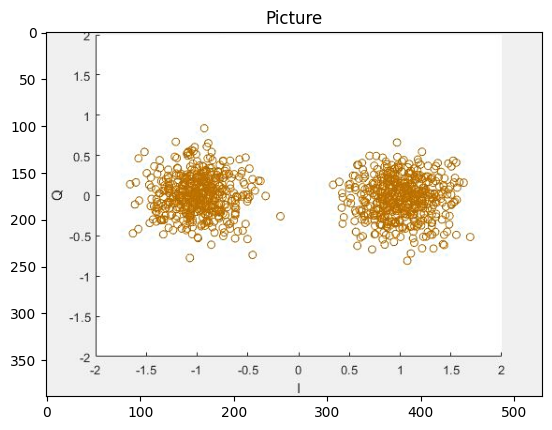

########################################
Prediction for 10.JPG is: BPSK


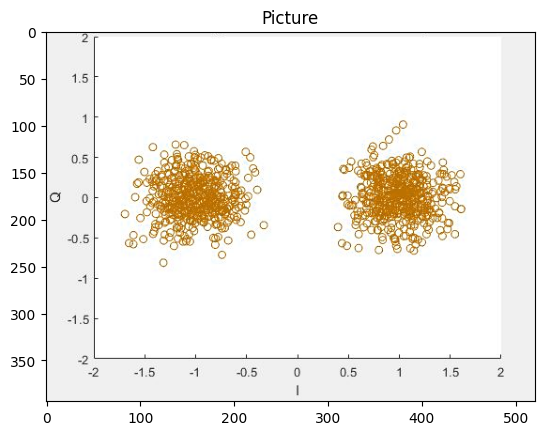

########################################
Prediction for 23.JPG is: BPSK


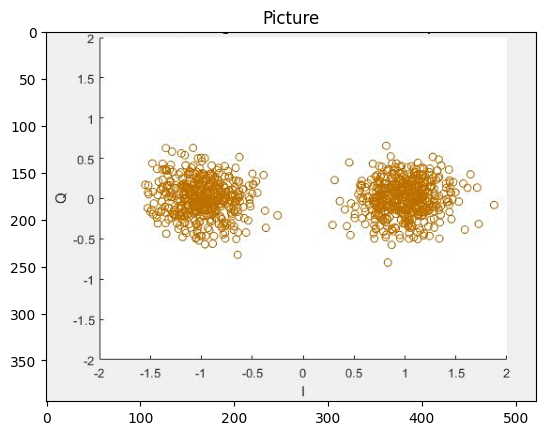

########################################
Prediction for 17.JPG is: BPSK


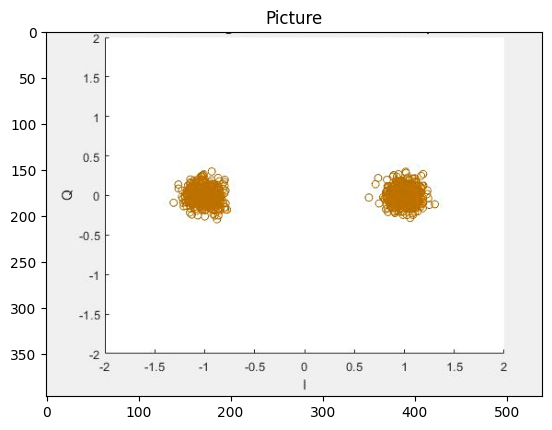

########################################
Prediction for 2.JPG is: BFSK


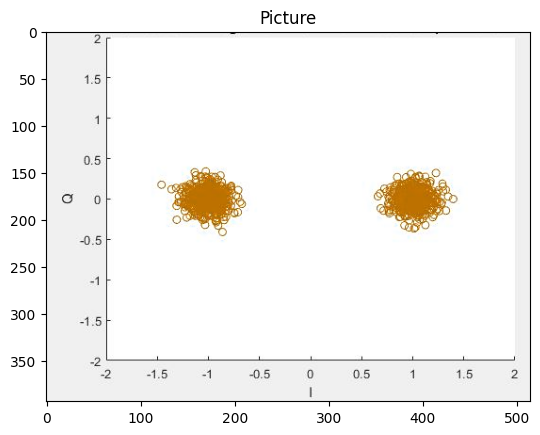

########################################
Prediction for 16.JPG is: BPSK


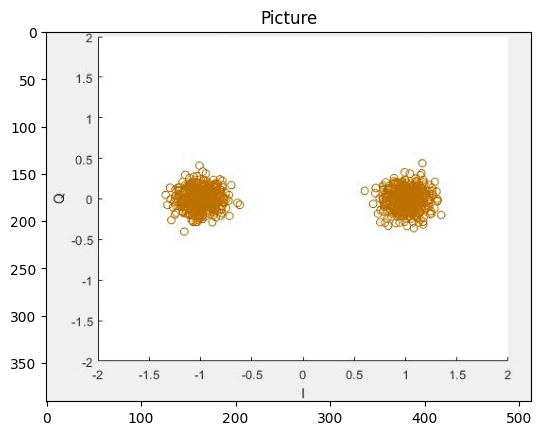

########################################
Prediction for 20.JPG is: BPSK


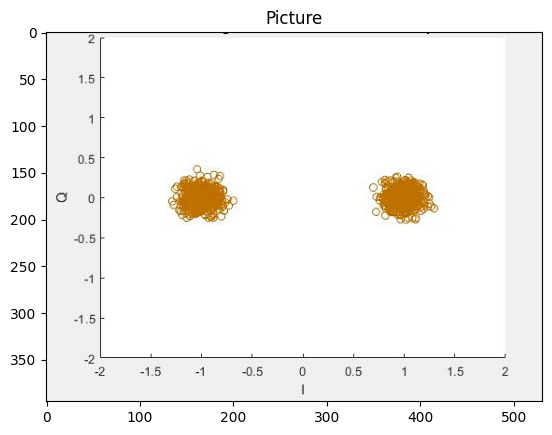

########################################
Prediction for 13.JPG is: BFSK


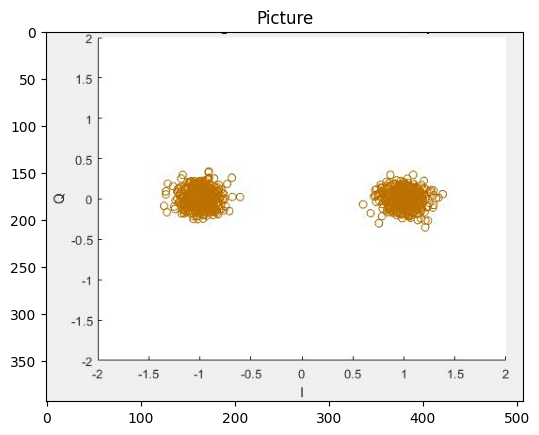

########################################
Prediction for 28.JPG is: BPSK


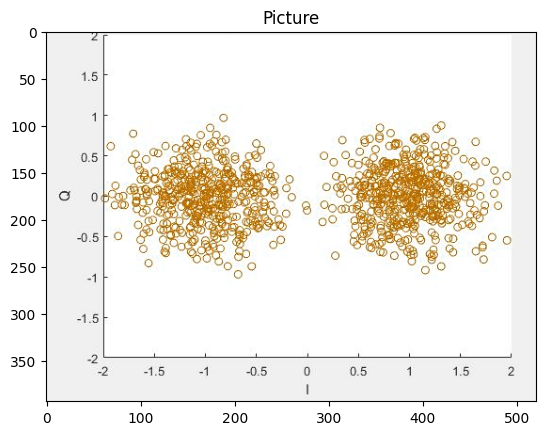

########################################
Prediction for 31.JPG is: BPSK


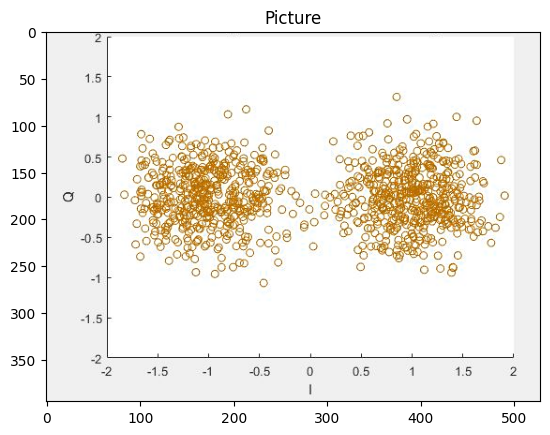

########################################
Prediction for 32.JPG is: BPSK


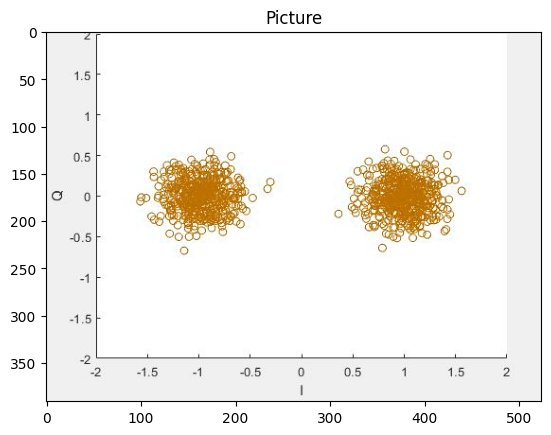

########################################
Prediction for 3.JPG is: BPSK


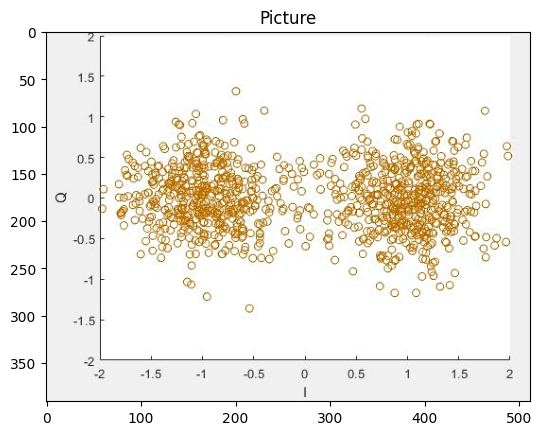

########################################
Prediction for 35.JPG is: BPSK


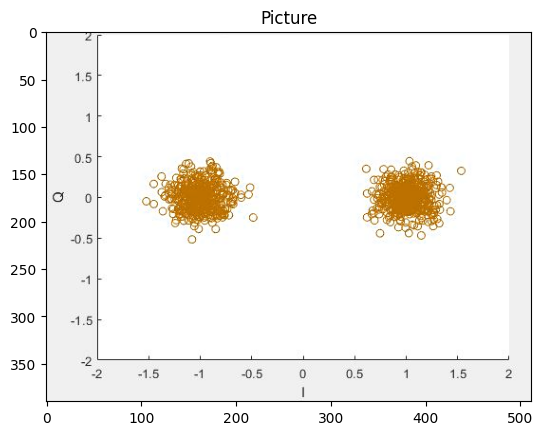

########################################
Prediction for 26.JPG is: BPSK


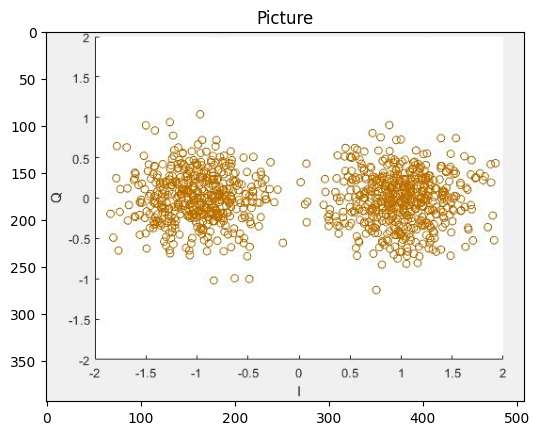

########################################
Prediction for 36.JPG is: BPSK


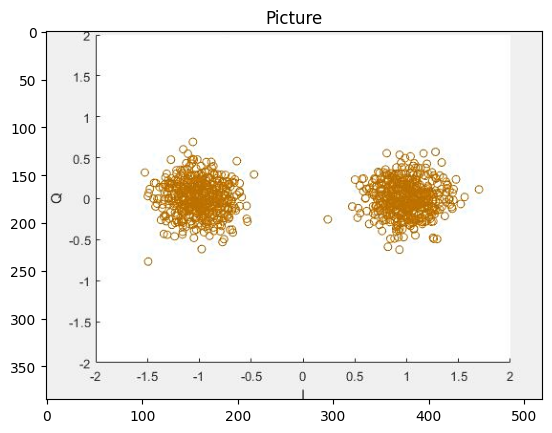

########################################
Prediction for 25.JPG is: BPSK


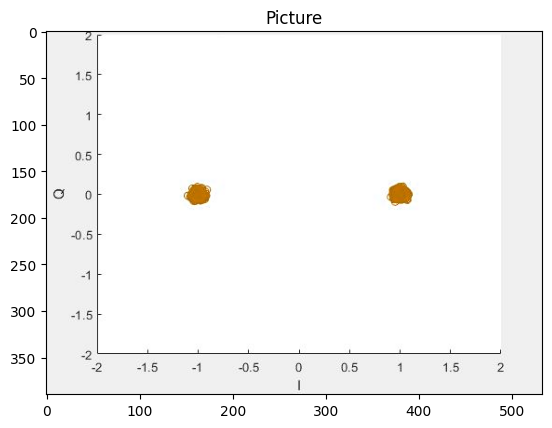

########################################
Prediction for 30.JPG is: BFSK


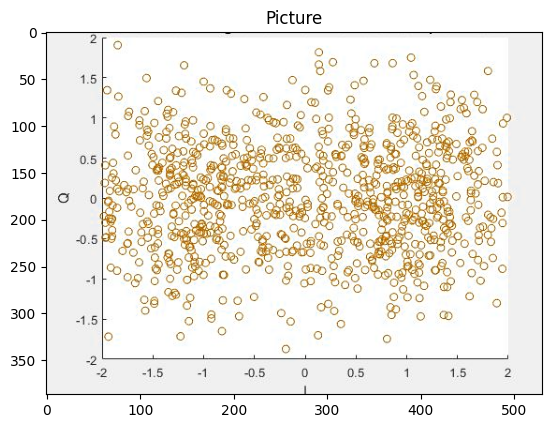

########################################
Prediction for 34.JPG is: BPSK


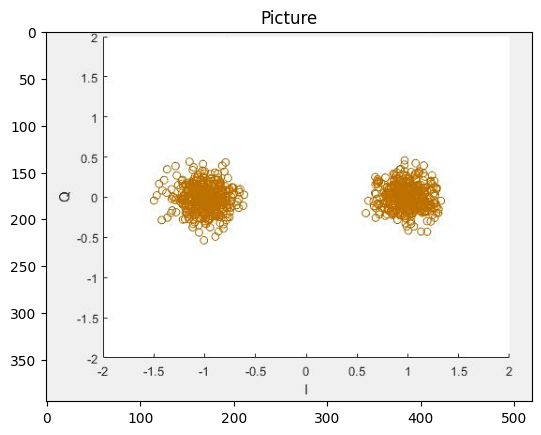

########################################
Prediction for 27.JPG is: BPSK


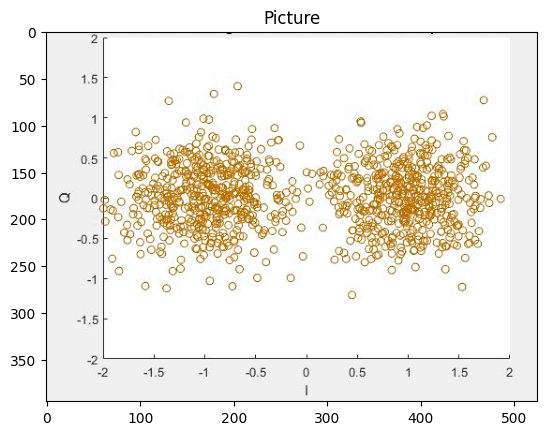

########################################
Prediction for 33.JPG is: BPSK


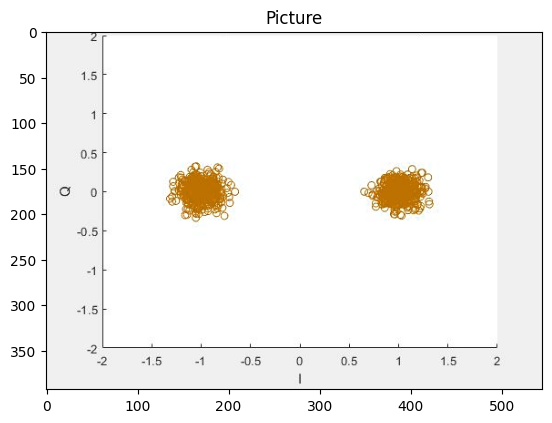

########################################
Prediction for 29.JPG is: BPSK


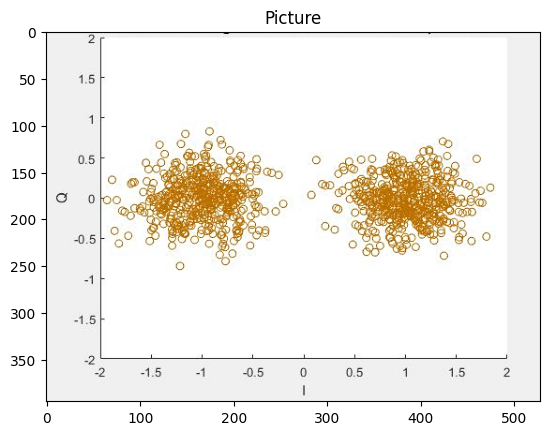

########################################
Prediction for 4.JPG is: BPSK


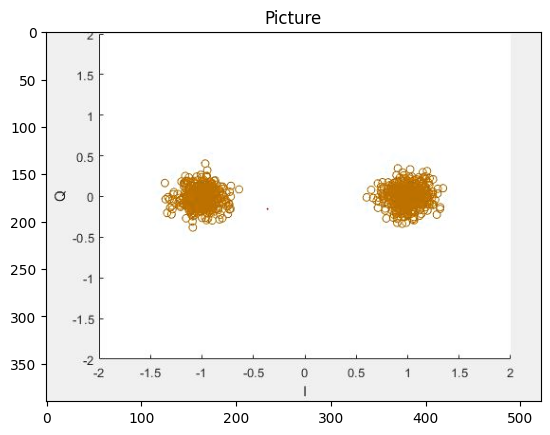

########################################
Prediction for 37.JPG is: BPSK


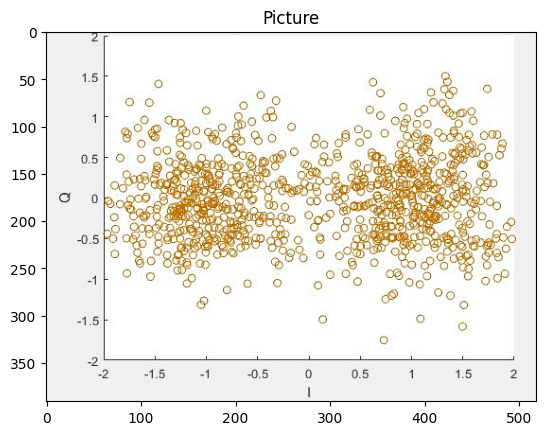

########################################
Prediction for 44.JPG is: BPSK


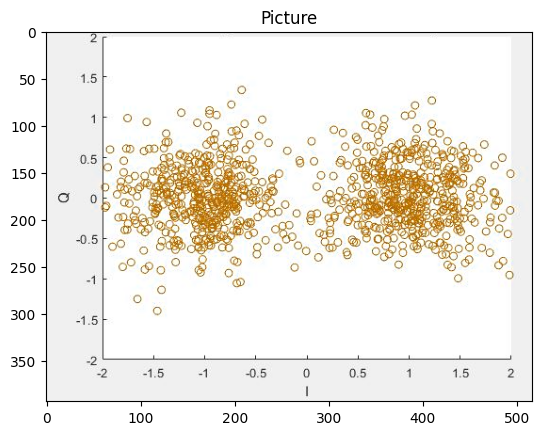

########################################
Prediction for 48.JPG is: BPSK


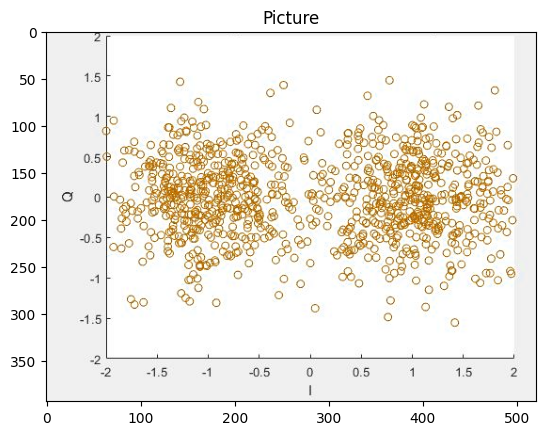

########################################
Prediction for 47.JPG is: BPSK


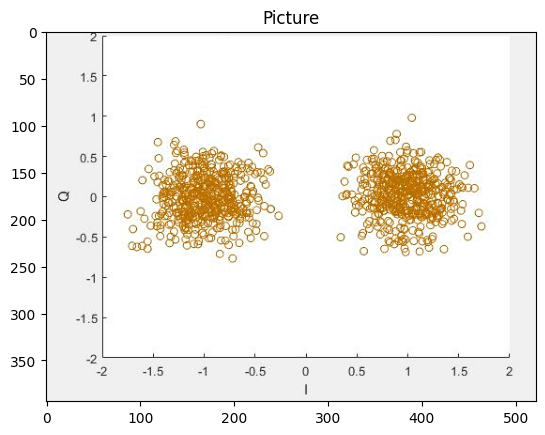

########################################
Prediction for 41.JPG is: BPSK


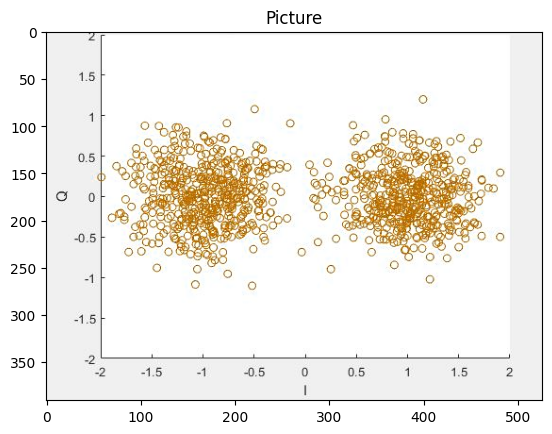

########################################
Prediction for 40.JPG is: BPSK


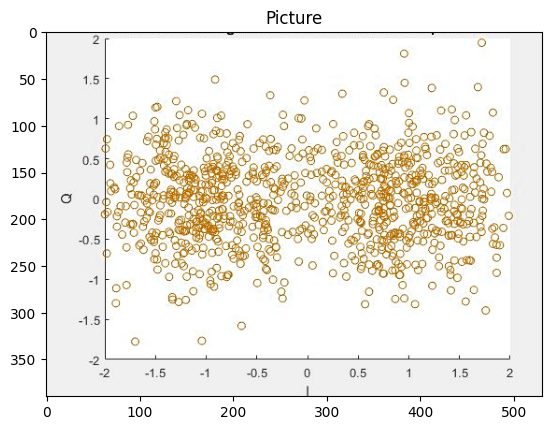

########################################
Prediction for 38.JPG is: BPSK


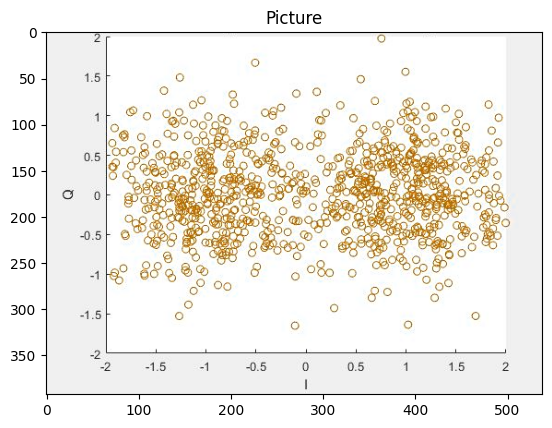

########################################
Prediction for 39.JPG is: BPSK


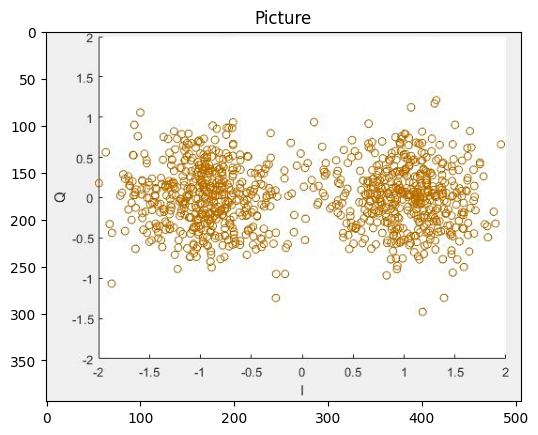

########################################
Prediction for 46.JPG is: BPSK


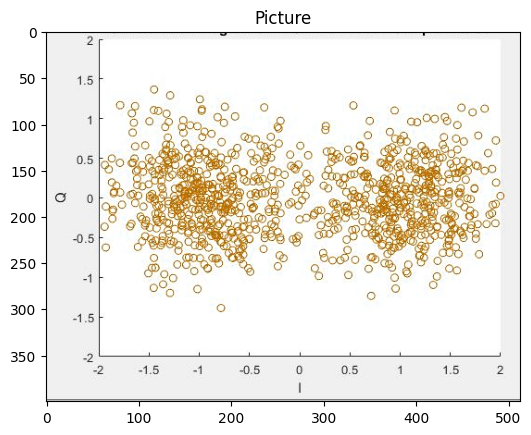

########################################
Prediction for 50.JPG is: BPSK


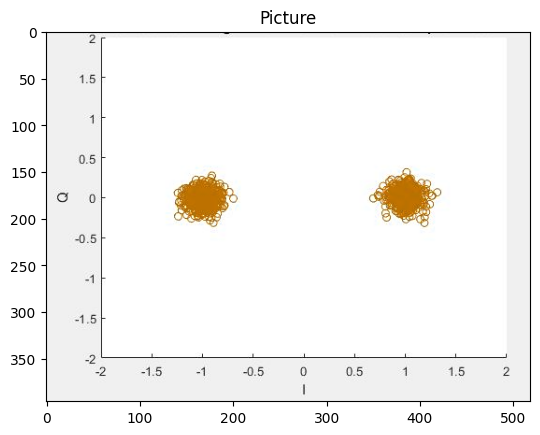

########################################
Prediction for 5.JPG is: BFSK


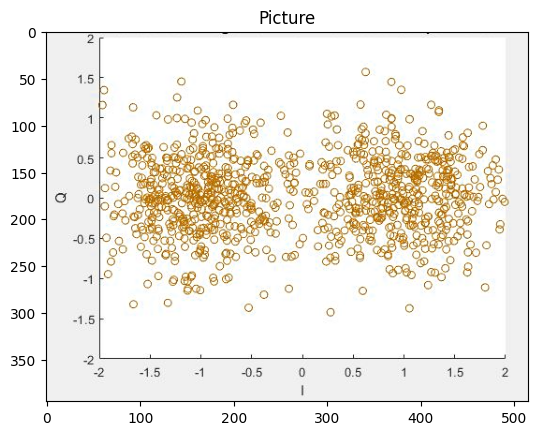

########################################
Prediction for 42.JPG is: BPSK


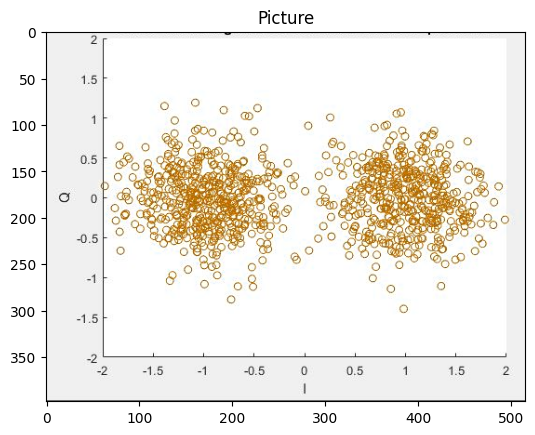

########################################
Prediction for 45.JPG is: BPSK


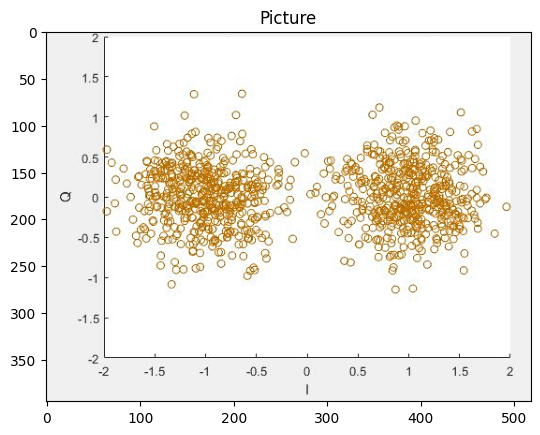

########################################
Prediction for 43.JPG is: BPSK


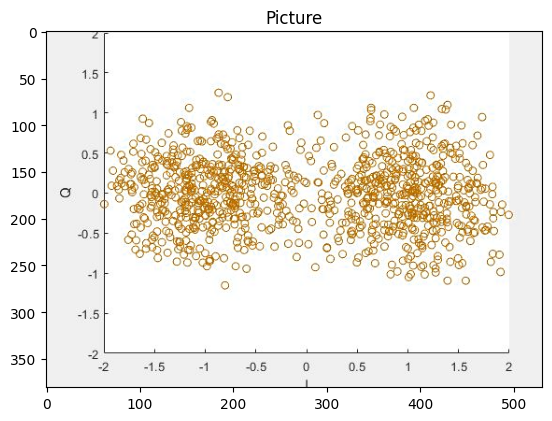

########################################
Prediction for 49.JPG is: BPSK


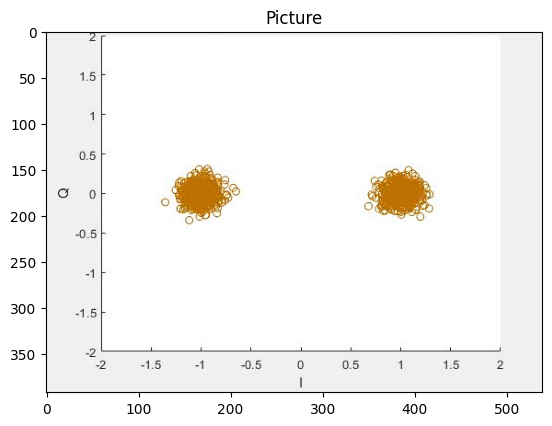

########################################
Prediction for 7.JPG is: BFSK


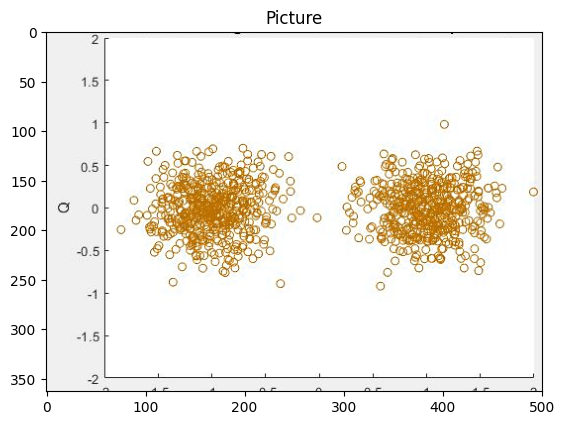

########################################
Prediction for 9.JPG is: BPSK


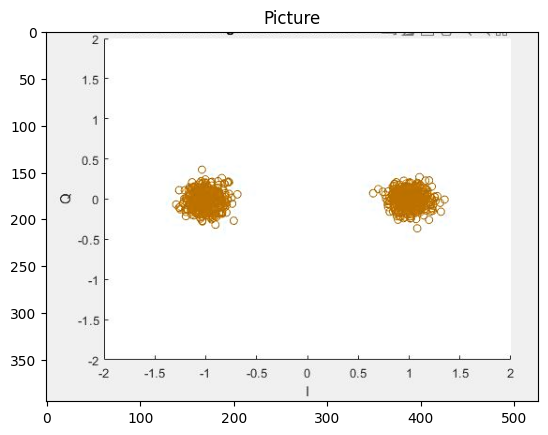

########################################
Prediction for 6.JPG is: BFSK


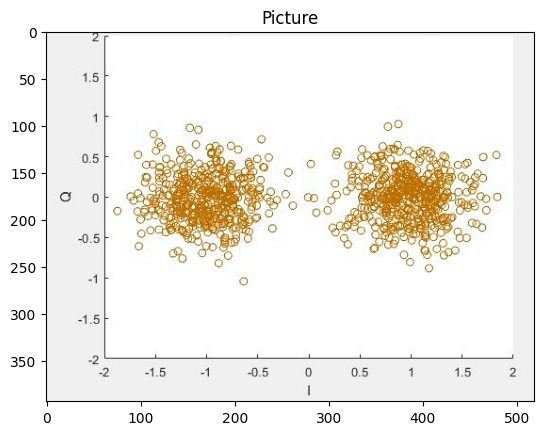

########################################
Prediction for 8.JPG is: BPSK


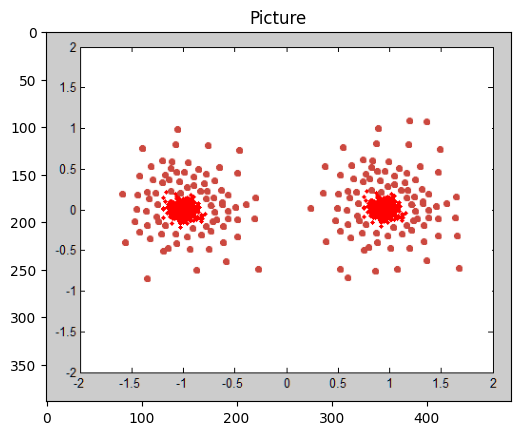

########################################
Prediction for 51.png is: BPSK


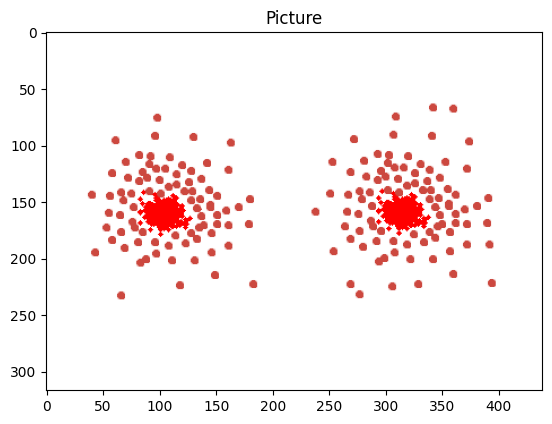

########################################
Prediction for 52.png is: BPSK


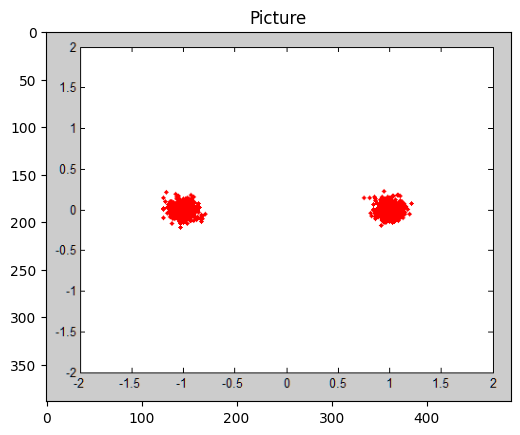

########################################
Prediction for 53.png is: BFSK


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/Different Data/bpsk"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    img = cv2.imread(image_path)
    plt.imshow(img)
    plt.title('Picture')
    plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/Different Data/bpsk"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


########################################
Prediction for 11.JPG is: BPSK
########################################
Prediction for 14.JPG is: BPSK
########################################
Prediction for 12.JPG is: BFSK
########################################
Prediction for 19.JPG is: BPSK
########################################
Prediction for 24.JPG is: BPSK
########################################
Prediction for 1.JPG is: BFSK
########################################
Prediction for 21.JPG is: BPSK
########################################
Prediction for 18.JPG is: BFSK
########################################
Prediction for 22.JPG is: BPSK
########################################
Prediction for 15.JPG is: BFSK
########################################
Prediction for 10.JPG is: BPSK
########################################
Prediction for 23.JPG is: BPSK
########################################
Prediction for 17.JPG is: BPSK
########################################
Prediction for 2.JPG is:

In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/test/BPSK"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/test/BFSK"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid/BASK"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid/BPSK"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])


In [ ]:
'''########################## Making Multiple predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_images_directory = "/content/drive/MyDrive/Automatic Modulation Classification - Research Project/Modulation Classifier/Data set/valid/BFSK"
ResultMap = {0: 'BASK', 1: 'BFSK', 2: 'BPSK'}  # Map class indices to labels

# Iterate over the images in the directory
for filename in os.listdir(test_images_directory):
    # Load and preprocess the image
    image_path = os.path.join(test_images_directory, filename)
    test_image = load_img(image_path, target_size=(128, 128))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the loaded model
    result = classifier.predict(test_image, verbose=0)

    # Display the image
    #img = cv2.imread(image_path)
    #plt.imshow(img)
    #plt.title('Picture')
    #plt.show()

    print('####' * 10)
    print('Prediction for', filename, 'is:', ResultMap[np.argmax(result)])
